<a href="https://colab.research.google.com/github/joooseb/Proyecto-Minero/blob/main/Curva_Tonelaje_Ley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desarrollo Curva Tonelaje Ley a través de un modelo de bloques en Python

Antes de realizar cualquier procedimiento es necesario importar las librerías de Python para trabajar con datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: "%.3f" % x)
%matplotlib inline

Posteriormente importamos el modelo de bloques en formato csv con la función de pandas read_csv() almacenando este en una variable y hacemos la llamada de la misma para obtener información de las primeras 5 y últimas 5 filas del set de datos.

In [2]:
g3 = pd.read_csv('/content/drive/MyDrive/Curva Tonelaje Ley/prm3.csv')

In [3]:
g3

,centroid_x,centroid_y,centroid_z,dim_x,dim_y,dim_z,volume,cu,veta,mine,au,densidad,tonelaje,ton_cu,ton_au,ley_aueqv,ley_cueqv,ton_cueqv,ton_aueqv,tonpr1,tonpr2,Tonelaje3,Tonelaje4
0,78361.000,4695.000,-273.000,5.000,5.000,5.000,125.000,0.409,3.000,100.000,0.363,2.540,2.540,1.038,0.923,1.433,0.548,1.391,3.639,0.760,1.961,1.074,2.810
1,78381.000,4700.000,-273.000,5.000,5.000,5.000,125.000,0.409,3.000,100.000,0.364,2.540,2.540,1.039,0.924,1.434,0.548,1.392,3.642,0.761,1.963,1.076,2.814
2,78211.000,4655.000,-263.000,5.000,5.000,5.000,125.000,0.365,3.000,100.000,0.358,2.540,2.540,0.928,0.910,1.315,0.503,1.276,3.339,0.666,1.839,0.924,2.417
3,78216.000,4655.000,-263.000,5.000,5.000,5.000,125.000,0.364,3.000,100.000,0.357,2.540,15.240,5.554,5.447,1.311,0.501,7.636,19.975,3.970,11.000,5.512,14.418
4,78216.000,4660.000,-263.000,5.000,5.000,5.000,125.000,0.366,3.000,100.000,0.359,2.540,10.160,3.723,3.651,1.318,0.504,5.118,13.389,2.676,7.373,3.714,9.716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29736,78106.000,4680.000,182.000,5.000,5.000,5.000,125.000,0.821,2.000,100.000,0.743,2.540,2.540,2.086,1.888,2.891,1.105,2.807,7.343,3.115,3.973,4.391,11.486
29737,78116.000,4680.000,182.000,5.000,5.000,5.000,125.000,0.808,2.000,100.000,0.729,2.540,2.540,2.052,1.853,2.843,1.087,2.760,7.221,3.009,3.905,4.243,11.101
29738,78121.000,4680.000,182.000,5.000,5.000,5.000,125.000,0.799,2.000,100.000,0.720,2.540,5.080,4.058,3.657,2.810,1.074,5.456,14.273,5.874,7.715,8.287,21.677
29739,78321.000,4780.000,182.000,5.000,5.000,5.000,125.000,1.025,2.000,100.000,0.799,2.540,2.540,2.604,2.030,3.481,1.331,3.380,8.841,4.291,4.633,6.165,16.127


con la función describe() de pandas obtendremos la estadística descriptiva de la ley del mineral, con el objeto de obtener información preliminar del comportamiento de la variable continua.

In [4]:
g3['ley_cueqv'].describe()

count   29741.000
mean        1.145
std         0.711
min         0.019
25%         0.593
50%         1.103
75%         1.560
max         4.178
Name: ley_cueqv, dtype: float64

En algunos casos es necesario conocer las dimensiones del bloque en sus 3 ejes para calcular el tonelaje del bloque, multiplicando el volumen (multiplicación de las 3 dimensiones) por la densidad del bloque. En este caso lo ilustraremos de ejemplo, ya que tanto las dimensiones como el tonelaje son entregados por el modelo de bloques directamente.

In [5]:
dim_x = 5
dim_y = 5
dim_z = 5

Posteriormente crearemos un nuevo DataFrame de pandas añadiendo como primera columna el límite inferior que iniciará en 0 y terminará en este caso en 2 (En nuestra estadística descriptiva la media de los datos es de 1.145 para una ley que va desde 0.019 hasta 4.178, en la media es donde existe una gran concentración de la ley, por tanto buscaremos un límite que se mueva entre este valor. Un límite de 2 entregaría información suficiente).

In [6]:
lim_g3 = pd.DataFrame({'Li': np.arange(0, 2.1, 0.1)})

In [7]:
lim_g3

,Li
0,0.000
1,0.100
2,0.200
3,0.300
4,0.400
5,0.500
6,0.600
7,0.700
8,0.800
9,0.900


Agregamos una nueva columna del límite superior que es en otras palabras, el límite inferior + 0.1 (0.1 equivale a la separación que tomaremos entre cada dato, es decir tendremos datos del 0 al 2. Esta separación es escogida con el fin de no tener una pérdida importante de datos al visualizar la curva en el caso de ser excesiva la separación o un exceso de información en caso de ser bastante pequeña).

In [8]:
lim_g3['Ls'] = lim_g3['Li'] + 0.1

Eliminamos el último dato ya que saldrá de nuestro límite 2 (tomando el valor de 2.1).

In [9]:
lim_g3.iloc[-1, 1] = np.nan

In [10]:
lim_g3

,Li,Ls
0,0.000,0.100
1,0.100,0.200
2,0.200,0.300
3,0.300,0.400
4,0.400,0.500
5,0.500,0.600
6,0.600,0.700
7,0.700,0.800
8,0.800,0.900
9,0.900,1.000


Luego, creamos una marca de clase que en nuestro caso estará definida por el promedio de los límites.

In [11]:
mc = lim_g3.loc[:, "Li":"Ls"]
lim_g3['Mc'] = mc.mean(axis=1)

In [12]:
lim_g3

,Li,Ls,Mc
0,0.000,0.100,0.050
1,0.100,0.200,0.150
2,0.200,0.300,0.250
3,0.300,0.400,0.350
4,0.400,0.500,0.450
5,0.500,0.600,0.550
6,0.600,0.700,0.650
7,0.700,0.800,0.750
8,0.800,0.900,0.850
9,0.900,1.000,0.950


Ahora es necesario conocer el tonelaje que se encuentra sobre el límite inferior ya que nuestro rango va desde un valor inferior de 0 hasta uno superior 2. Para ello almacenaremos en una lista los valores de la suma de los tonelajes que están sobre el límite inferior de la ley equivalente de nuestro modelo de bloques y lo agregamos a una nueva columna.

In [13]:
tonelaje = []
for i,li  in enumerate(lim_g3['Li']):
  tonelaje.append(g3.loc[g3["ley_cueqv"] > li, "ton_cueqv"].sum())
lim_g3["Tonelaje"] = tonelaje

In [14]:
lim_g3

,Li,Ls,Mc,Tonelaje
0,0.000,0.100,0.050,6584693.488
1,0.100,0.200,0.150,6565299.557
2,0.200,0.300,0.250,6545488.646
3,0.300,0.400,0.350,6514372.719
4,0.400,0.500,0.450,6459618.212
5,0.500,0.600,0.550,6384582.211
6,0.600,0.700,0.650,6182769.894
7,0.700,0.800,0.750,5976980.339
8,0.800,0.900,0.850,5791309.104
9,0.900,1.000,0.950,5559875.073


Posteriormente obtenemos el tonelaje marginal, lo que equivale a la diferencia entre el tonelaje superior con el que le sigue en la tabla.

In [15]:
lim_g3["Tonelaje Mg"] = (- lim_g3["Tonelaje"].diff(periods=1).dropna().reset_index(drop=True))

In [16]:
lim_g3

,Li,Ls,Mc,Tonelaje,Tonelaje Mg
0,0.000,0.100,0.050,6584693.488,19393.930
1,0.100,0.200,0.150,6565299.557,19810.911
2,0.200,0.300,0.250,6545488.646,31115.927
3,0.300,0.400,0.350,6514372.719,54754.507
4,0.400,0.500,0.450,6459618.212,75036.001
5,0.500,0.600,0.550,6384582.211,201812.317
6,0.600,0.700,0.650,6182769.894,205789.555
7,0.700,0.800,0.750,5976980.339,185671.234
8,0.800,0.900,0.850,5791309.104,231434.031
9,0.900,1.000,0.950,5559875.073,203229.804


El último valor es equivalente al último de la columna de tonelajes y se rellena debido a que no tiene un dato con que restarse.

In [17]:
lim_g3["Tonelaje Mg"].fillna(lim_g3.iloc[-1, 3], inplace=True)

In [18]:
lim_g3

,Li,Ls,Mc,Tonelaje,Tonelaje Mg
0,0.000,0.100,0.050,6584693.488,19393.930
1,0.100,0.200,0.150,6565299.557,19810.911
2,0.200,0.300,0.250,6545488.646,31115.927
3,0.300,0.400,0.350,6514372.719,54754.507
4,0.400,0.500,0.450,6459618.212,75036.001
5,0.500,0.600,0.550,6384582.211,201812.317
6,0.600,0.700,0.650,6182769.894,205789.555
7,0.700,0.800,0.750,5976980.339,185671.234
8,0.800,0.900,0.850,5791309.104,231434.031
9,0.900,1.000,0.950,5559875.073,203229.804


El último paso para este DataFrame es agregar la ley media, la cual se obtiene de una media ponderada de la marca de clase con el tonelaje marginal divido por la suma del tonelaje marginal. Se almacenan los valores en una lista y se agregar a una nueva columna del DataFrame.

In [19]:
ley_media = []
for i in range(lim_g3.shape[0]):
  value = ((lim_g3.loc[i:,"Mc"] * lim_g3.loc[i:,"Tonelaje Mg"]).sum()) / lim_g3.loc[i:, "Tonelaje Mg"].sum()
  ley_media.append(value)

In [20]:
lim_g3["Ley Media"] = ley_media

In [21]:
lim_g3

,Li,Ls,Mc,Tonelaje,Tonelaje Mg,Ley Media
0,0.000,0.100,0.050,6584693.488,19393.930,1.471
1,0.100,0.200,0.150,6565299.557,19810.911,1.475
2,0.200,0.300,0.250,6545488.646,31115.927,1.479
3,0.300,0.400,0.350,6514372.719,54754.507,1.485
4,0.400,0.500,0.450,6459618.212,75036.001,1.495
5,0.500,0.600,0.550,6384582.211,201812.317,1.507
6,0.600,0.700,0.650,6182769.894,205789.555,1.538
7,0.700,0.800,0.750,5976980.339,185671.234,1.569
8,0.800,0.900,0.850,5791309.104,231434.031,1.595
9,0.900,1.000,0.950,5559875.073,203229.804,1.626


Finalmente debemos construir el DataFrame a graficar, el cual tendrá como primera columna la ley de corte, que corresponde a la columna de límite inferior del DataFrame anterior.

In [22]:
leyc = pd.DataFrame({'Ley de Corte': lim_g3["Li"]})

In [23]:
leyc

,Ley de Corte
0,0.000
1,0.100
2,0.200
3,0.300
4,0.400
5,0.500
6,0.600
7,0.700
8,0.800
9,0.900


Luego el tonelaje, que corresponde al tonelaje calculado en el DataFrame anterior dividido por 1 millón para dejarlo en millones de toneladas (para una lectura más sencilla del gráfico).

In [24]:
leyc["Tonelaje (Mt)"] = lim_g3["Tonelaje"] / (10**6)

In [25]:
leyc

,Ley de Corte,Tonelaje (Mt)
0,0.000,6.585
1,0.100,6.565
2,0.200,6.545
3,0.300,6.514
4,0.400,6.460
5,0.500,6.385
6,0.600,6.183
7,0.700,5.977
8,0.800,5.791
9,0.900,5.560


Luego agregamos la ley media que es la calculada en el DataFrame anterior.

In [26]:
leyc["Ley Media (%)"] = lim_g3["Ley Media"]

In [27]:
leyc

,Ley de Corte,Tonelaje (Mt),Ley Media (%)
0,0.000,6.585,1.471
1,0.100,6.565,1.475
2,0.200,6.545,1.479
3,0.300,6.514,1.485
4,0.400,6.460,1.495
5,0.500,6.385,1.507
6,0.600,6.183,1.538
7,0.700,5.977,1.569
8,0.800,5.791,1.595
9,0.900,5.560,1.626


Finalmente realizamos el gráfico de la curva tonelaje ley del modelo de bloques utilizando la librería matplotlib con una gráfica con la ley de corte en el eje x, la ley media en un eje y secundario y el tonelaje en el eje primario y.

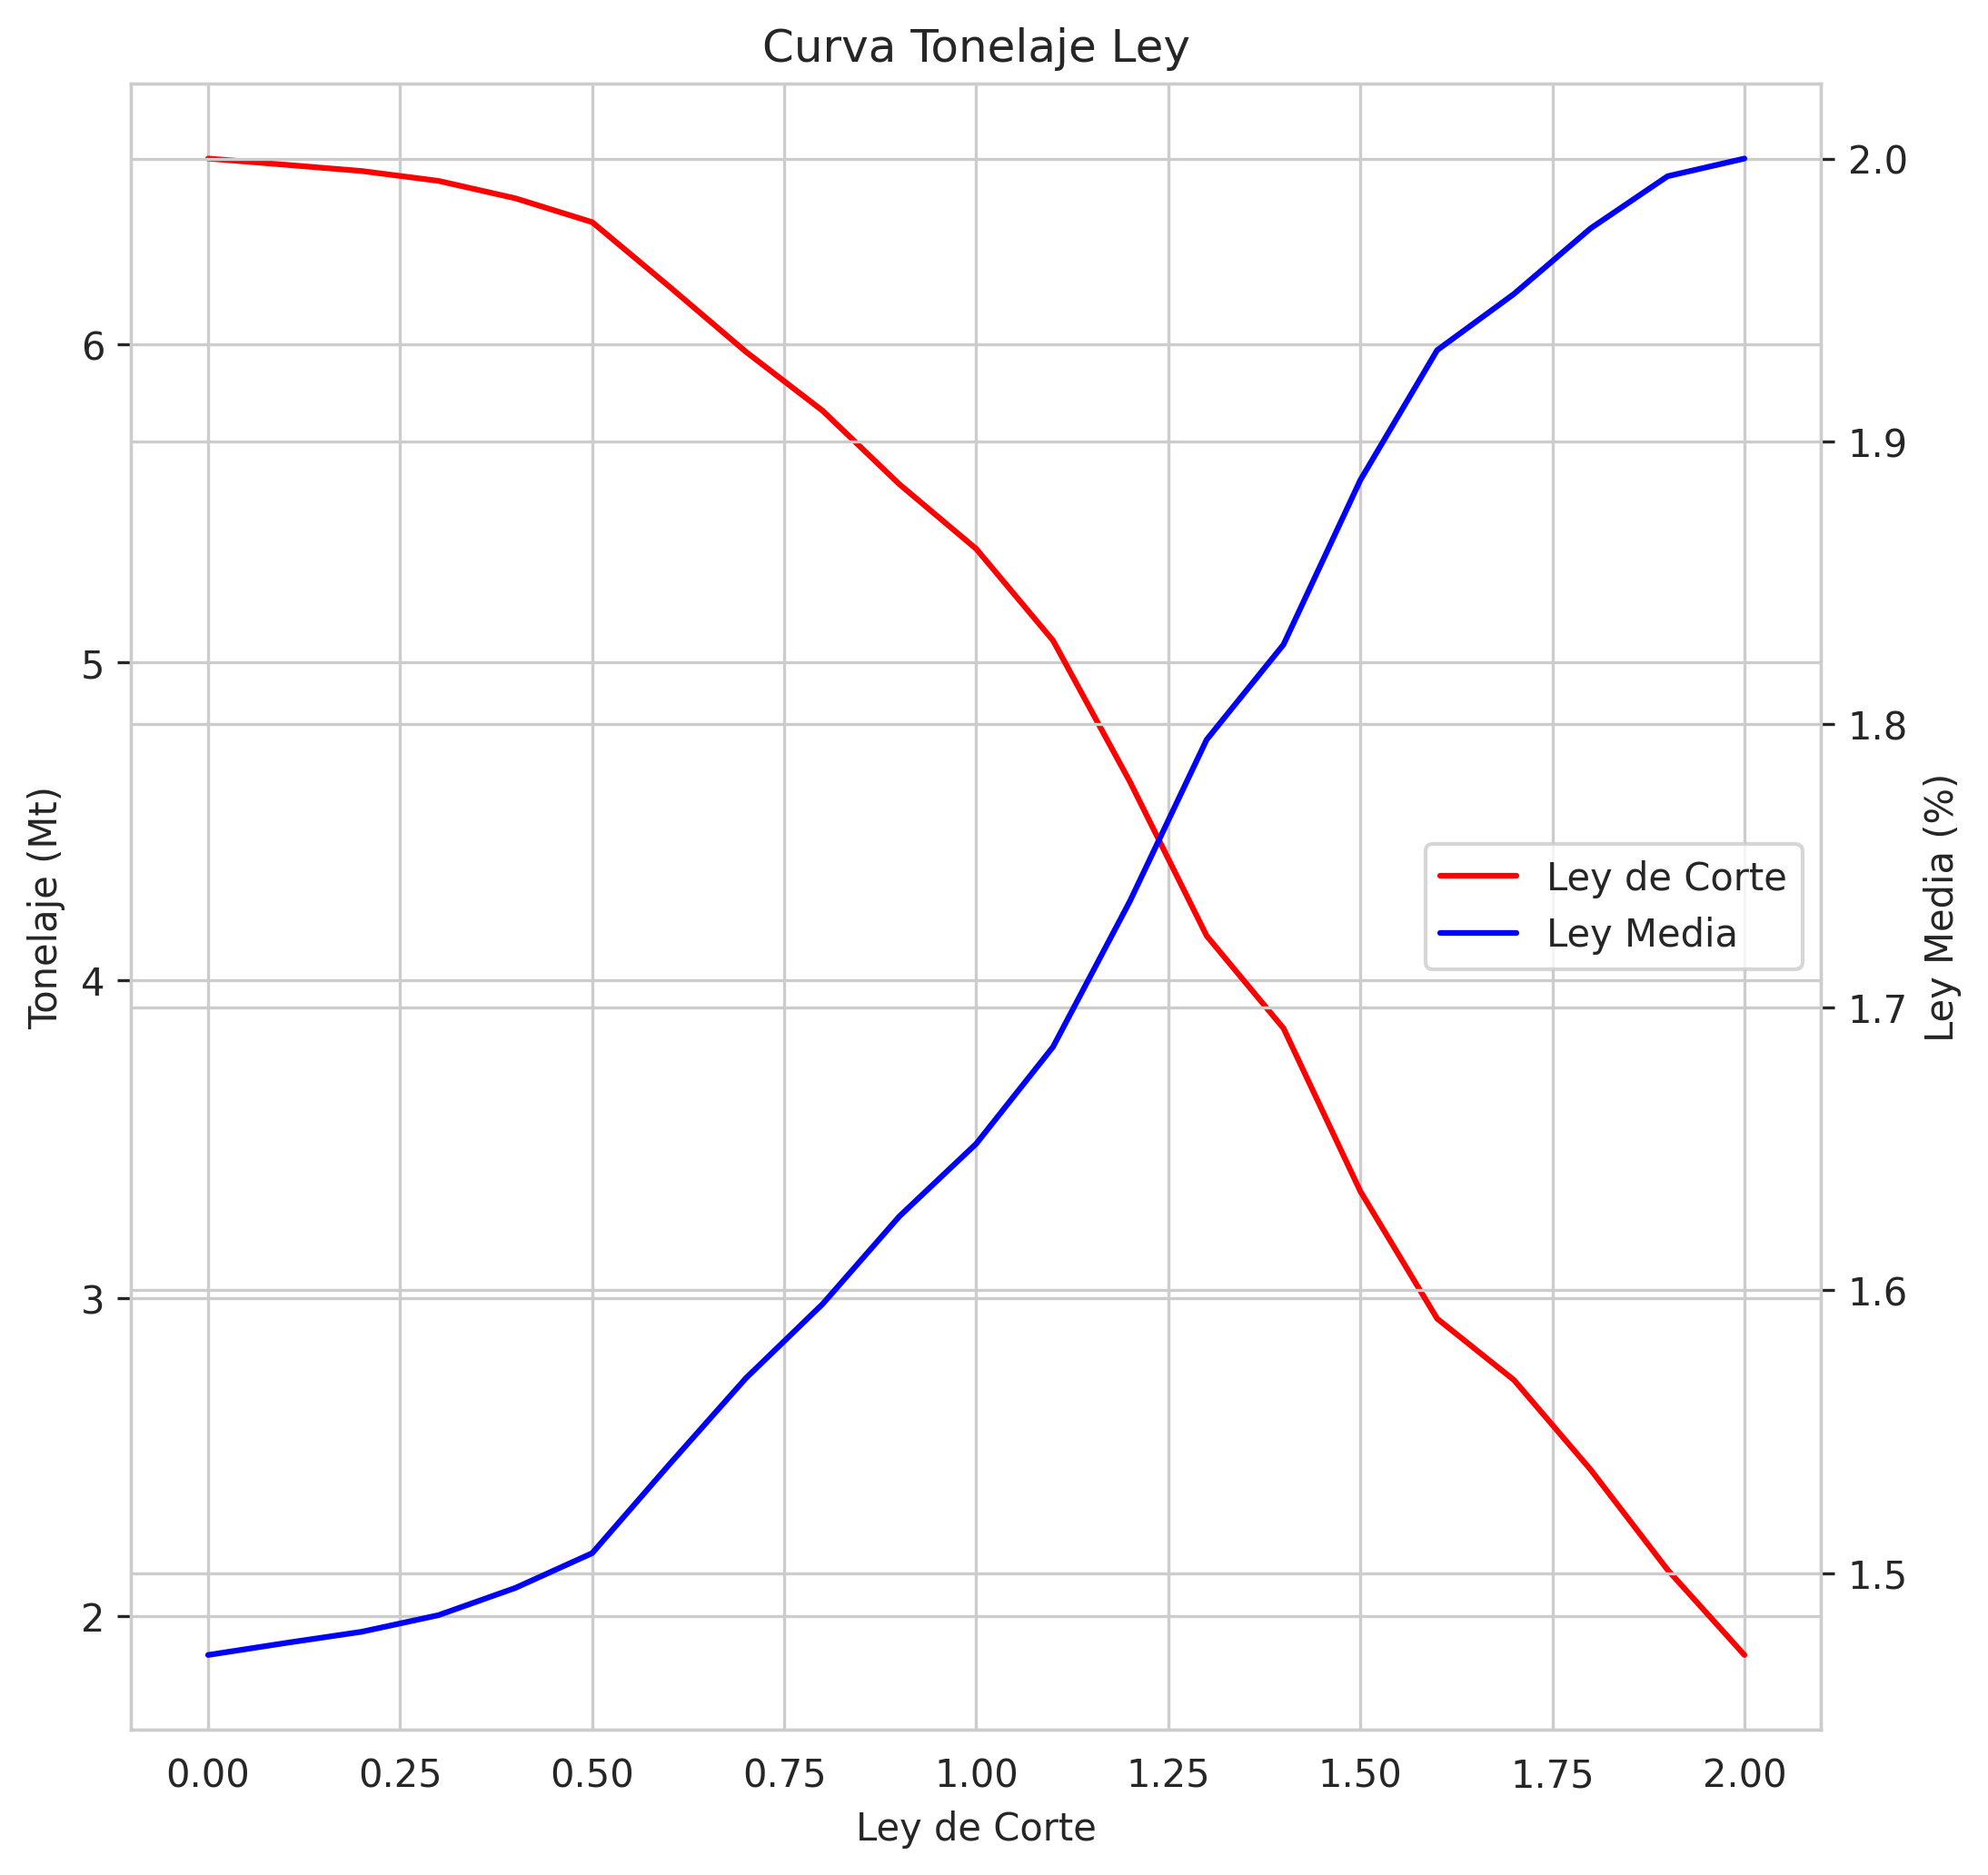

In [28]:
fig, ax = plt.subplots(dpi=(300), figsize=(8, 8))

twin1 = ax.twinx()
p1, = ax.plot(leyc["Ley de Corte"], leyc["Tonelaje (Mt)"], color="r", label="Ley de Corte")
p2, = twin1.plot(leyc["Ley de Corte"], leyc["Ley Media (%)"], color="b", label="Ley Media")

ax.set_title("Curva Tonelaje Ley")
ax.set_xlabel("Ley de Corte")
ax.set_ylabel("Tonelaje (Mt)")

twin1.set_ylabel("Ley Media (%)")

ax.legend(handles=[p1, p2], loc="center right")
plt.show()